In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_file import *

In [65]:
def harvesting_phases(trial):
        dif = []
        for i,value in enumerate(trial):
            if i > 0:
                dif.append(value - trial[i-1])
        pulling = [dif.index(max(dif))-1, dif.index(min(dif))+1]
        release = [pulling[1], pulling[1]*2 - pulling[0]]
        return pulling, release

In [162]:
def process_data(harvest_data, pulling_force, ref_loadcell, ref_pressure, phase):
        pull_ref, release_ref = harvesting_phases(ref_loadcell)
        reference1 = np.array(ref_pressure[pull_ref[0]:pull_ref[1]])       # Pulling phase
        reference2 = np.array(ref_pressure[release_ref[0]:release_ref[1]]) # Release Phase

        pull, release = harvesting_phases(pulling_force)
        pull_data = np.array(harvest_data[pull[0]:pull[1]])               # Pulling phase
        release_data = np.array(harvest_data[release[0]:release[1]])      # Release Phase

        harvest_ref = []
        new_data = []

        if phase == 1:   # Pulling phase
            delta_i = np.abs(reference1.shape[0]-pull_data.shape[0]) 
            if reference1.shape[0] < pull_data.shape[0]:
                begin = pull_ref[0]-delta_i
                if begin < 0:
                    begin = 0
                harvest_ref = np.append(ref_pressure[begin:pull_ref[0]], reference1)
                new_data = pull_data[0:harvest_ref.shape[0]]
                
            elif reference1.shape[0] > pull_data.shape[0]:
                begin = pull[0]-delta_i
                if begin < 0:
                    begin = 0
                new_data = np.append(harvest_data[begin:pull[0]], pull_data)
                harvest_ref = reference1[0:new_data.shape[0]]
        
        elif phase == 2: # Release Phase
            delta_i = np.abs(reference2.shape[0]-release_data.shape[0]) 
            if reference2.shape[0] < release_data.shape[0]:
                end = release_ref[1]+delta_i+1
                if end > len(harvest_ref):
                    end = len(harvest_ref)
                harvest_ref = np.append(harvest_ref[release_ref[1]+1:end], harvest_ref)
                new_data = release_data[0:harvest_ref.shape[0]]
                
            elif reference2.shape[0] > release_data.shape[0]:
                end = release[1]+delta_i+1
                if end > len(harvest_data):
                    end = len(harvest_data)
                new_data = np.append(harvest_data[release[1]+1:end], new_data)
                harvest_ref = reference2[0:new_data.shape[0]]
        return new_data, harvest_ref

In [67]:
def get_reference(filename):
    harvest_ref = []
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)

    harvest_ref = [float(x) for x in rows[0]]
    return np.array(harvest_ref)

# Trials made on: 08/06/2022

alpha = 20, speed_L = 0.1, acc_L = 0.1

In [108]:
from data20220608 import *

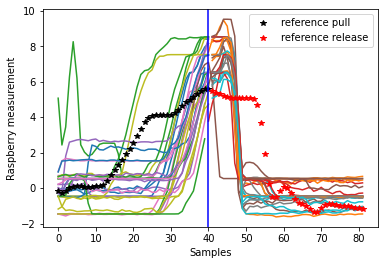

In [109]:
for i in range(1,31):
    data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
    data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
    plt.plot(range(data1.shape[0]), data1)
    plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

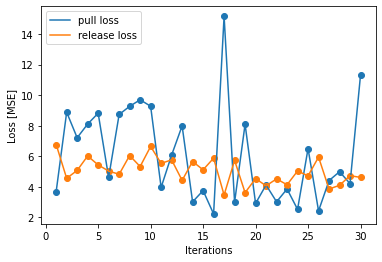

In [110]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(1,31):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Force [g]')

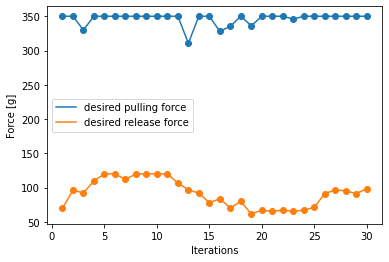

In [111]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(1,31):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

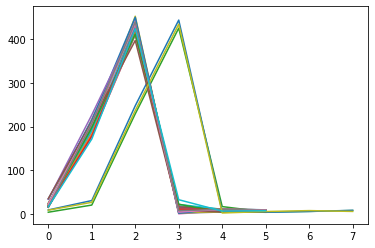

In [112]:
for i in range(1,31):
    pulling, release = harvesting_phases(pulling_force[i])
    plt.plot(range(len(pulling_force[i][pulling[0]:release[1]])), pulling_force[i][pulling[0]:release[1]])
# plt.axvline(x = pulling[0], color = 'b', label = 'axvline - full height')
# plt.axvline(x = release[1], color = 'b', label = 'axvline - full height')

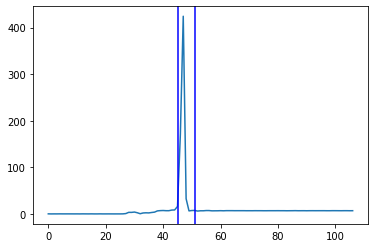

In [113]:
margin = 0
pulling, release = harvesting_phases(pulling_force[i])
plt.plot(range(len(pulling_force[i])), pulling_force[i])
plt.axvline(x = pulling[0]-margin, color = 'b', label = 'axvline - full height')
plt.axvline(x = release[1]+margin, color = 'b', label = 'axvline - full height')

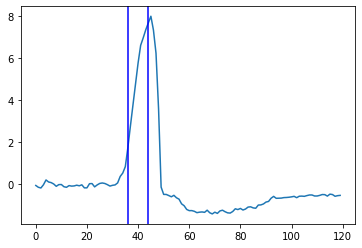

In [114]:
margin = 0
i = 3
pulling, release = harvesting_phases(pulling_force[i])
plt.plot(range(len(raspberry_reading[i])), raspberry_reading[i])
plt.axvline(x = pulling[0]-margin, color = 'b', label = 'axvline - full height')
plt.axvline(x = release[1]+margin, color = 'b', label = 'axvline - full height')

In [115]:
# for i in range(1,31):
#     plt.plot(range(len(pulling_force[i])), pulling_force[i])#, _,label='iter='+str(k))
#     # plt.legend(loc="upper right")
#     k += 1
# plt.plot(range(len(ref_loadcell[400:400+140])), ref_loadcell[400:400+140], 'k*', label = 'refence')
# plt.legend(loc="upper right")
# # plt.xlabel("Samples")
# plt.ylabel("Raspberry loadcell measurement")


# Trials made on: 09/06/2022

alpha = 30, speed_L = 0.1, acc_L = 0.1

In [17]:
from data20220609 import *

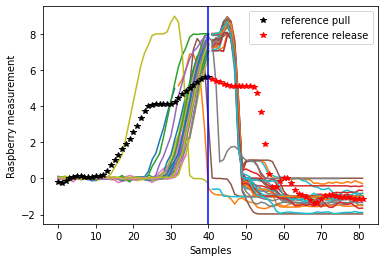

In [18]:
for i in range(1,31):    
    data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
    data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
    plt.plot(range(data1.shape[0]), data1)
    plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

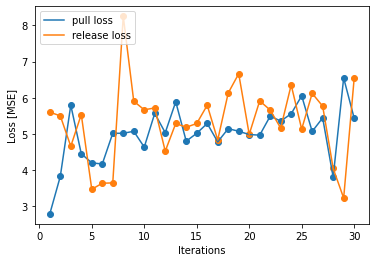

In [19]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(1,31):    
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Reference - Raspberry measurement')

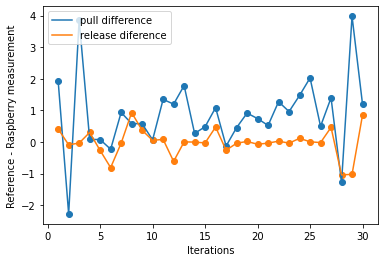

In [20]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(1,31):
    plot_dif0.append(dif[i][0])
    plot_dif1.append(dif[i][1])
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull difference')
plt.plot(x_dif, plot_dif1,label='release diference')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Reference - Raspberry measurement")

Text(0, 0.5, 'Force [g]')

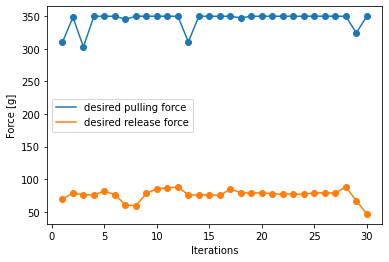

In [21]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(1,31):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

# Trials made on: 13/06/2022

alpha = 20, speed_L = 0.1, acc_L = 0.1

In [5]:
from data20220613 import *

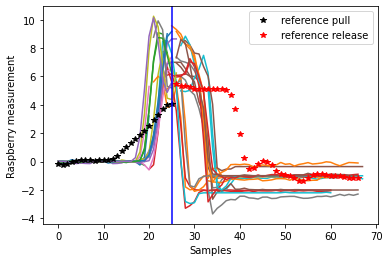

In [8]:
for i in range(1,31):
    if len(raspberry_reading[i]) > 1 and i!= 23:
        data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
        data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
        plt.plot(range(data1.shape[0]), data1)
        plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

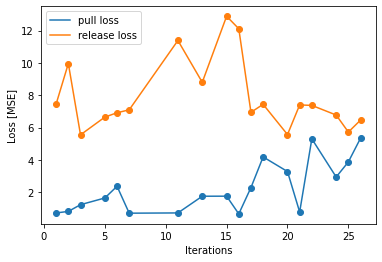

In [11]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(1,31):
    if loss[i][0] !=0:
        plot_loss0.append(loss[i][0])
        plot_loss1.append(loss[i][1])
        x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Reference - Raspberry measurement')

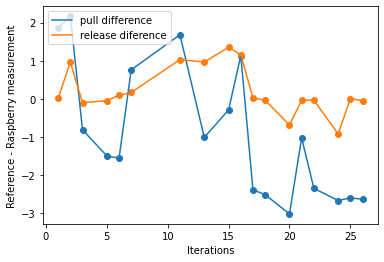

In [12]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(1,31):
    if dif[i][0] != 0:
        plot_dif0.append(dif[i][0])
        plot_dif1.append(dif[i][1])
        x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull difference')
plt.plot(x_dif, plot_dif1,label='release diference')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Reference - Raspberry measurement")

Text(0, 0.5, 'Force [g]')

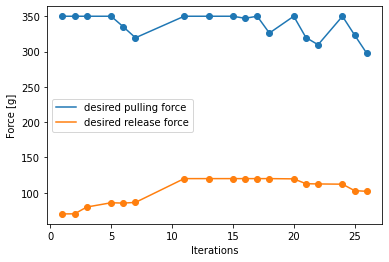

In [13]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(1,31):
    if Fd[i][0] != 0:
        plot_Fd0.append(Fd[i][0])
        plot_Fd1.append(Fd[i][1])
        x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

alpha = 20, speed_L = 0.1, acc_L = 0.1

In [42]:
from data20220613_2 import *

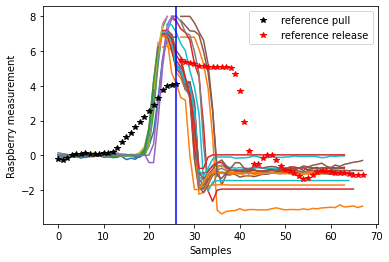

In [43]:
for i in range(1,31):
    if len(raspberry_reading[i]) > 1 and i!=7:
        data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
        data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
        plt.plot(range(data1.shape[0]), data1)
        plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

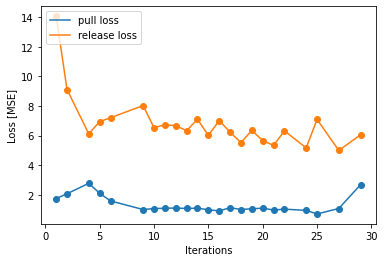

In [44]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(1,31):
    if loss[i][0] !=0:
        plot_loss0.append(loss[i][0])
        plot_loss1.append(loss[i][1])
        x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Reference - Raspberry measurement')

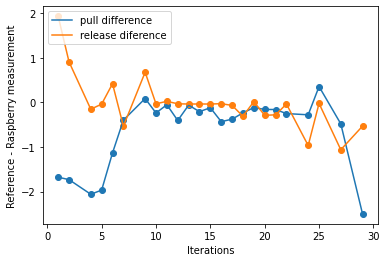

In [45]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(1,31):
    if dif[i][0] != 0:
        plot_dif0.append(dif[i][0])
        plot_dif1.append(dif[i][1])
        x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull difference')
plt.plot(x_dif, plot_dif1,label='release diference')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Reference - Raspberry measurement")

In [51]:
plot_dif0.index(-min(np.abs(plot_dif0)))

8

Text(0, 0.5, 'Force [g]')

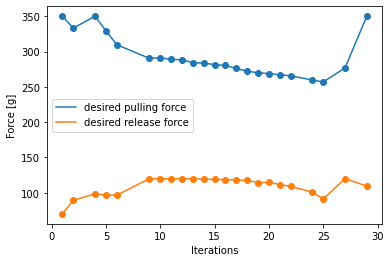

In [46]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(1,31):
    if Fd[i][0] != 0:
        plot_Fd0.append(Fd[i][0])
        plot_Fd1.append(Fd[i][1])
        x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

In [53]:
plot_Fd0[8]

288.28771134

alpha = 20, speed_L = 0.1, acc_L = 0.1

In [23]:
from data20220613_3 import *

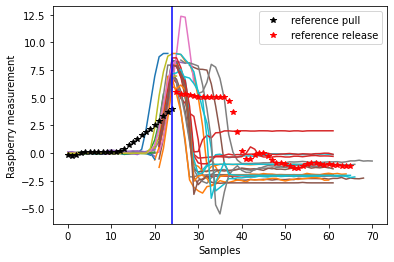

In [28]:
for i in range(1,31):
    if len(raspberry_reading[i]) > 1 and i!=3 and i!=13:
        data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
        data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
        plt.plot(range(data1.shape[0]), data1)
        plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

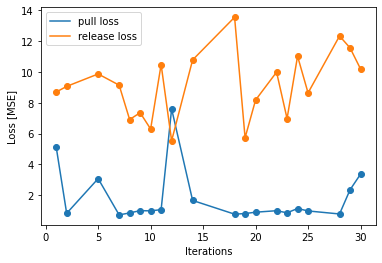

In [29]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(1,31):
    if loss[i][0] !=0:
        plot_loss0.append(loss[i][0])
        plot_loss1.append(loss[i][1])
        x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Reference - Raspberry measurement')

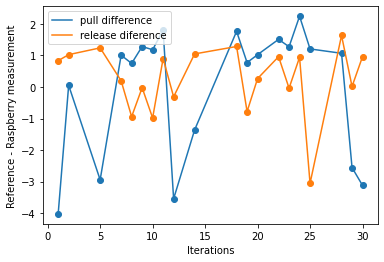

In [30]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(1,31):
    if dif[i][0] != 0:
        plot_dif0.append(dif[i][0])
        plot_dif1.append(dif[i][1])
        x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull difference')
plt.plot(x_dif, plot_dif1,label='release diference')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Reference - Raspberry measurement")

Text(0, 0.5, 'Force [g]')

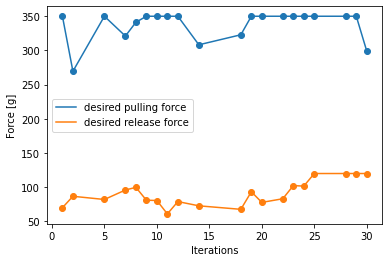

In [31]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(1,31):
    if Fd[i][0] != 0:
        plot_Fd0.append(Fd[i][0])
        plot_Fd1.append(Fd[i][1])
        x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

# Trials made on: 15/06/2022

alpha = 25, speed_L = 0.1, acc_L = 0.1, beta_p = 0.0002, beta_i = 0.0000007 

In [5]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220615/Training Parametres20220615-4.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
find_fd = 'Fd = ['
pressure_reading = 'Raspberry Reading = ['
pull_force = 'Pulling Force = ['
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry.csv"

In [6]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(pressure_reading, fail_index, rows)
pulling_force = read_pressure_pulling_force(pull_force, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell.csv'

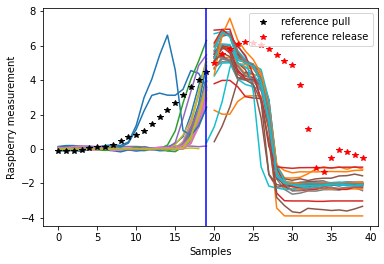

In [60]:
for i in range(30):
    # if len(raspberry_reading[i]) > 1:# and i!= 23:
    data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
    data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
    plt.plot(range(data1.shape[0]), data1)
    plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

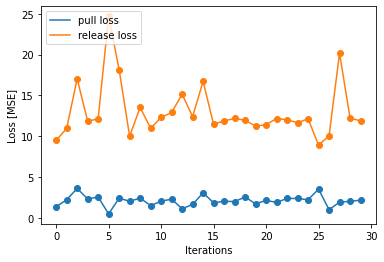

In [61]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(30):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Relative error(%)')

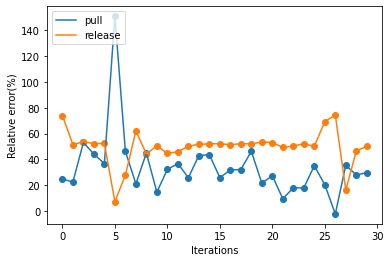

In [62]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(30):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")

In [63]:
min(np.abs(plot_dif1))

7.1537093463942725

Text(0, 0.5, 'Force [g]')

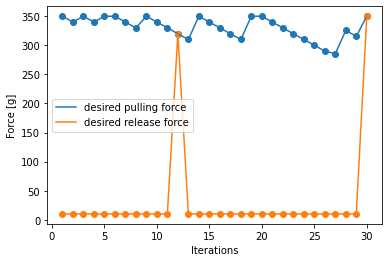

In [38]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(1,31):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

# Trials made on: 19/06/2022

### alpha = 25, speed_L = 0.1, acc_L = 0.1, beta_p = 0.00005, beta_i = 0.0000001

#### Raspberry stiffnes to pull: 0.23g

In [163]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_023g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
# find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
# find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = '
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_023g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_023g.csv"

In [164]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
# time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
# pulling_gripper = read_pressure_pulling_force(find_pull_gripper, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

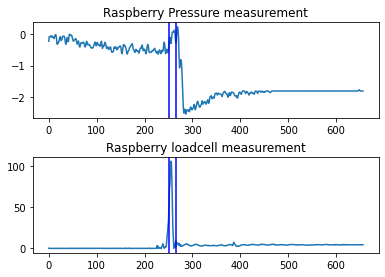

In [165]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [169]:
margin = 0
pulling = [0]*len(raspberry_reading)
release = [0]*len(raspberry_reading)
for i in range(len(raspberry_reading)):
    pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(2)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4)

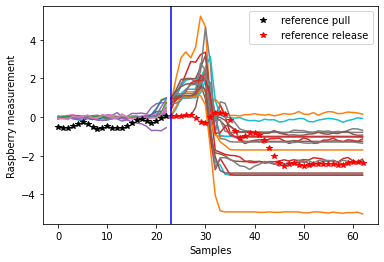

In [170]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')


# for i in range(len(raspberry_reading)):
#     # if len(raspberry_reading[i]) > 1:# and i!= 23:
#     data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
#     data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
#     plt.plot(range(data1.shape[0]), data1)
#     plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
# plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
# plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
# plt.legend(loc="upper right")
# plt.xlabel("Samples")
# plt.ylabel("Raspberry measurement")
# plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

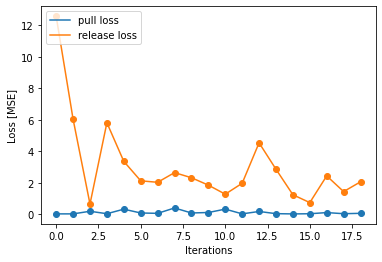

In [171]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

(-5000.0, 1000.0)

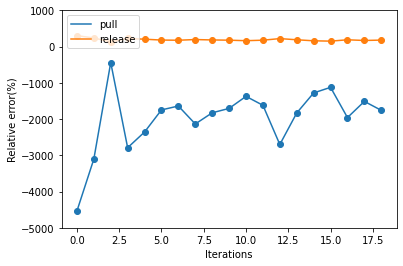

In [172]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-5000, 1000])
# plt.ylim([-100, 100])

Text(0, 0.5, 'Force [g]')

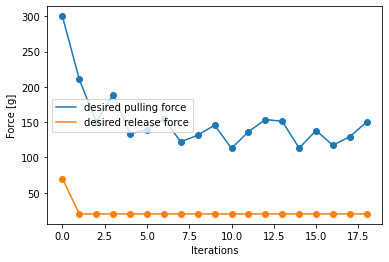

In [14]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

#### Raspberry stiffnes to pull: 4g

In [178]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_4g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
# find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
# find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = '
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_4g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_4g.csv"

In [179]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
# time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
# pulling_gripper = read_pressure_pulling_force(find_pull_gripper, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

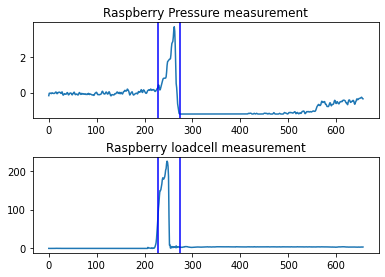

In [180]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [181]:
margin = 0
pulling = [0]*len(raspberry_reading)
release = [0]*len(raspberry_reading)
for i in range(len(raspberry_reading)):
    pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(2)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4)

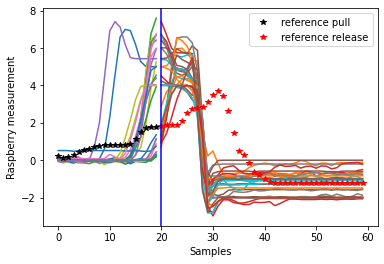

In [182]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

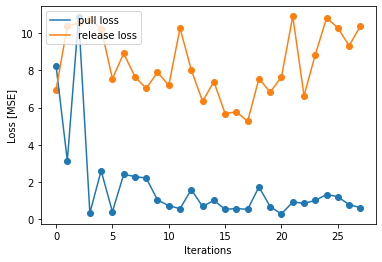

In [148]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

(-1000.0, 1000.0)

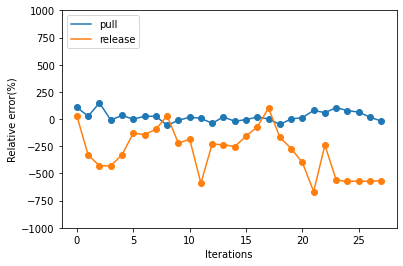

In [135]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-1000, 1000])

Text(0, 0.5, 'Force [g]')

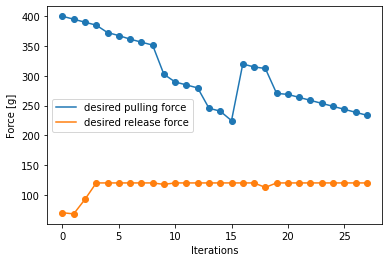

In [24]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

#### Raspberry stiffnes to pull: 5g

In [183]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_5g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
# find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
# find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = '
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_5g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_5g.csv"

In [184]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
# time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
# pulling_gripper = read_pressure_pulling_force(find_pull_gripper, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

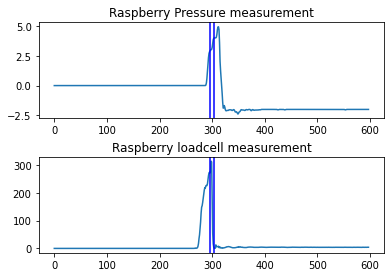

In [185]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [186]:
margin = 0
pulling = [0]*len(raspberry_reading)
release = [0]*len(raspberry_reading)
for i in range(len(raspberry_reading)):
    pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(2)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4)

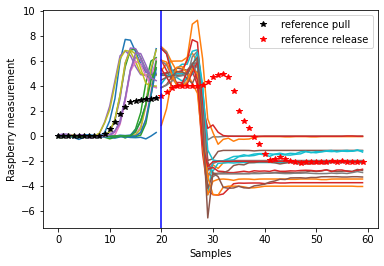

In [187]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')

# for i in range(len(raspberry_reading)):
#     # if len(raspberry_reading[i]) > 1:# and i!= 23:
#     data1, ref1 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 1)
#     data2, ref2 = process_data(raspberry_reading[i], pulling_force[i], ref_loadcell, ref_pressure, 2)
#     plt.plot(range(data1.shape[0]), data1)
#     plt.plot(range(data1.shape[0],data1.shape[0]+data2.shape[0]), data2)
# plt.plot(range(ref1.shape[0]), ref1, 'k*',label='reference pull')
# plt.plot(range(ref1.shape[0],ref1.shape[0]+ref2.shape[0]), ref2, 'r*',label='reference release')
# plt.legend(loc="upper right")
# plt.xlabel("Samples")
# plt.ylabel("Raspberry measurement")
# plt.axvline(x =ref1.shape[0]-1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

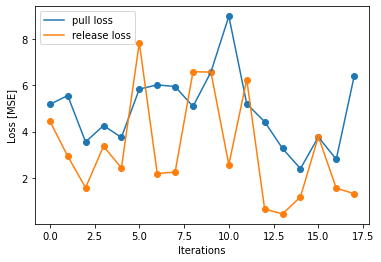

In [30]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

(-100.0, 100.0)

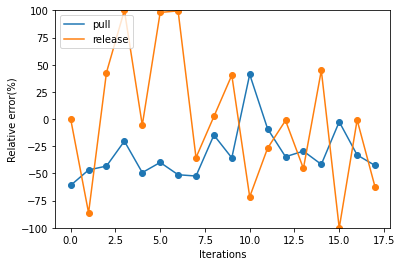

In [156]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-100, 100])

Text(0, 0.5, 'Force [g]')

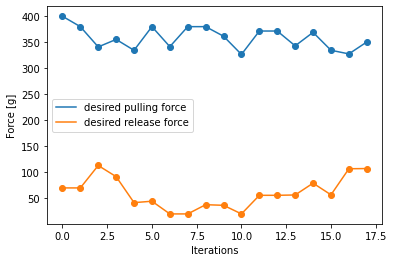

In [32]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

#### Raspberry stiffnes to pull: 7g

In [188]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_7g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
# find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
# find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = '
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_7g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_7g.csv"

In [189]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
# time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
# pulling_gripper = read_pressure_pulling_force(find_pull_gripper, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

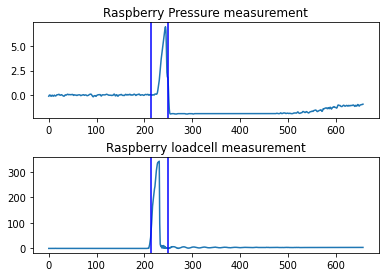

In [190]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [192]:
margin = 0
pulling = [0]*len(raspberry_reading)
release = [0]*len(raspberry_reading)
for i in range(len(raspberry_reading)):
    pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(2)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4)

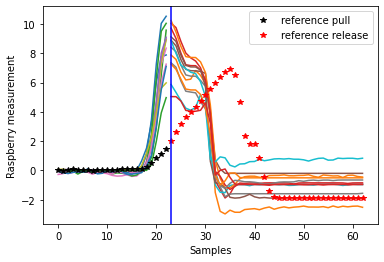

In [193]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')


Text(0, 0.5, 'Loss [MSE]')

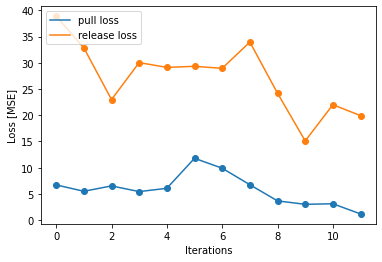

In [41]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

(-1000.0, 1000.0)

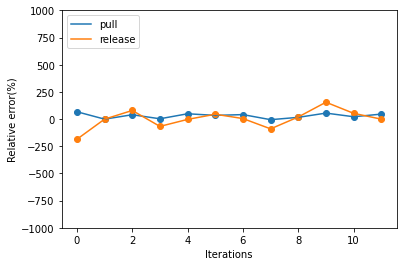

In [195]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-1000, 1000])

Text(0, 0.5, 'Force [g]')

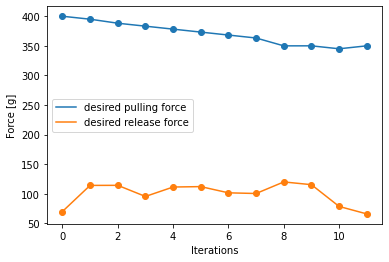

In [43]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

#### Raspberry stiffnes to pull: 6g

In [196]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_6g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_7g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_7g.csv"

In [197]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

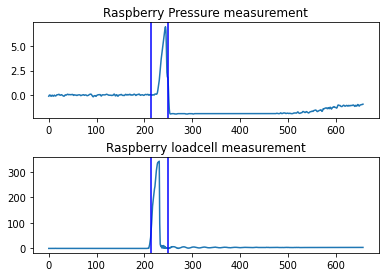

In [198]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [199]:
margin = 0
pulling = [0]*len(raspberry_reading)
release = [0]*len(raspberry_reading)
for i in range(len(raspberry_reading)):
    pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(3)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     axs[2].plot(range(len(pulling_gripper[i])), pulling_gripper[i])
#     axs[2].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[2].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[2].set_title('Gripper loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.5, 
#                         hspace=0.8
#                         )

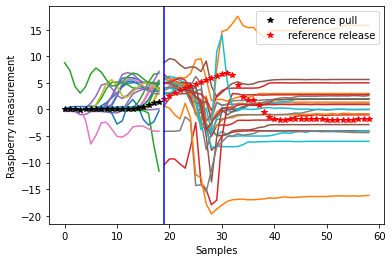

In [200]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

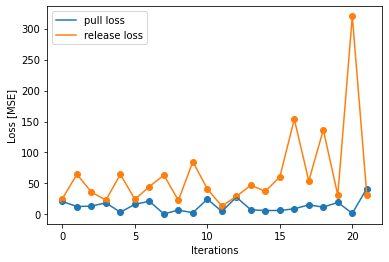

In [201]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

(-1000.0, 1000.0)

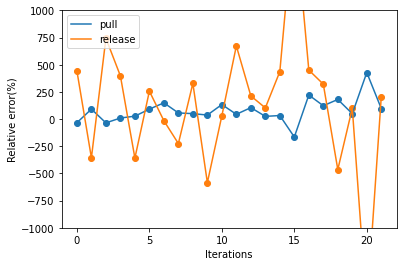

In [203]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-1000, 1000])

Text(0, 0.5, 'Force [g]')

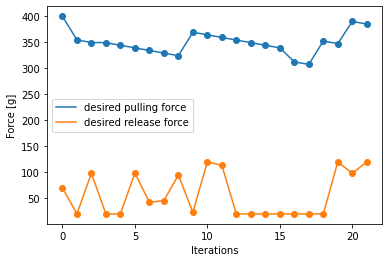

In [204]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

#### Raspberry stiffnes to pull: 6g

In [211]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_2g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = '
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_2g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_2g.csv"

In [212]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
pulling_gripper = read_pressure_pulling_force(find_pull_gripper, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

ValueError: could not convert string to float: '[1.3961308002471924'

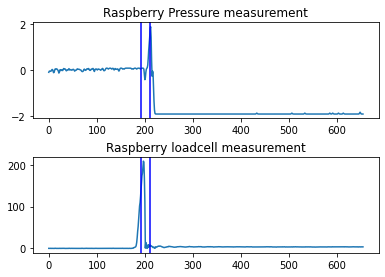

In [213]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [214]:
margin = 0
pulling = [0]*len(raspberry_reading)
release = [0]*len(raspberry_reading)
for i in range(len(raspberry_reading)):
    pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(2)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     axs[2].plot(range(pulling_gripper.shape[0]), pulling_gripper)
#     axs[2].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
#     axs[2].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
#     axs[1].set_title('Gripper loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.8)

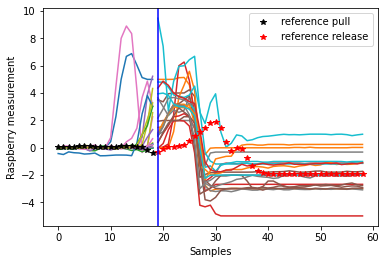

In [215]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

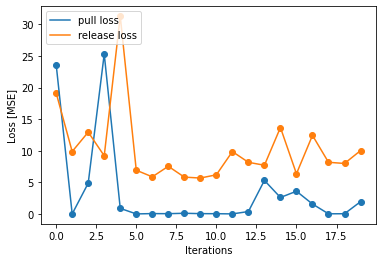

In [216]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Relative error(%)')

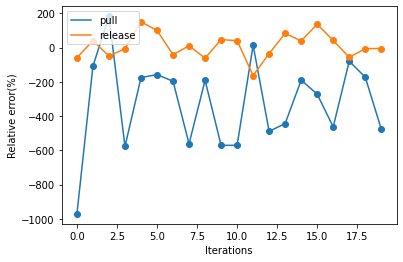

In [217]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0]*100)
    plot_dif1.append(error[i][1]*100)
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")

Text(0, 0.5, 'Force [g]')

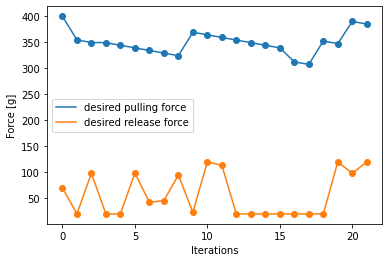

In [218]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")

#### Raspberry stiffnes to pull: 6g

In [ ]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220620/Training Parametres_6g.txt'
find_loss = ['Pulling loss = ', 'Release loss = ']
find_error = ['Pulling force relative error = ', 'Release force relative error = ']
find_dif = ['Pulling difference = ', 'Release difference = ']
find_fd = 'Fd = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
ref_l = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_loadcell_7g.csv"
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/human_harvest_raspberry_7g.csv"

In [ ]:
rows = read_csv_file(filename)
ref_loadcell = get_reference(ref_l)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
loss = read_loss_error(find_loss, fail_index, rows)
error = read_loss_error(find_error, fail_index, rows)
dif = read_loss_error(find_error, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
Fd = read_Fd(find_fd, fail_index, rows)

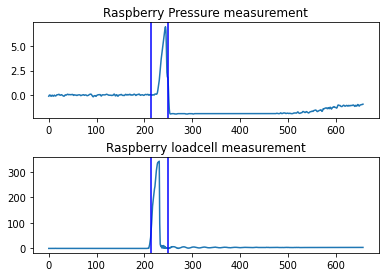

In [ ]:
margin = 0
pulling_ref, release_ref = harvesting_phases(ref_loadcell)
# Reference
fig, axs= plt.subplots(2)
axs[0].plot(range(ref_pressure.shape[0]), ref_pressure)
axs[0].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[0].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[0].set_title('Raspberry Pressure measurement')
axs[1].plot(range(ref_loadcell.shape[0]), ref_loadcell)
axs[1].axvline(x = pulling_ref[0]-margin, color = 'b', label = 'axvline - full height')
axs[1].axvline(x = release_ref[1]+margin, color = 'b', label = 'axvline - full height')
axs[1].set_title('Raspberry loadcell measurement')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [59]:
# margin = 0
# pulling = [0]*len(raspberry_reading)
# release = [0]*len(raspberry_reading)
# for i in range(len(raspberry_reading)):
#     pulling[i], release[i] = harvesting_phases(pulling_force[i])
#     fig, axs= plt.subplots(3)
#     axs[0].plot(range(len(raspberry_reading[i])), raspberry_reading[i])
#     axs[0].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[0].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[0].set_title('Raspberry Pressure measurement')
#     axs[1].plot(range(len(pulling_force[i])), pulling_force[i])
#     axs[1].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[1].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[1].set_title('Raspberry loadcell measurement')
#     axs[2].plot(range(len(pulling_gripper[i])), pulling_gripper[i])
#     axs[2].axvline(x = pulling[i][0]-margin, color = 'r', label = 'axvline - full height')
#     axs[2].axvline(x = release[i][1]+margin, color = 'r', label = 'axvline - full height')
#     axs[2].set_title('Gripper loadcell measurement')
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.5, 
#                         hspace=0.8
#                         )

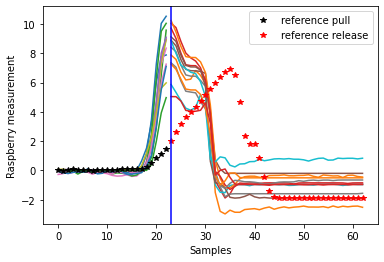

In [ ]:
shortest1 = np.min(np.array(pulling), axis=0)[1]
shortest2 = 40
for i in range(len(raspberry_reading)):
    l1 = len(raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    l2 = l1+len(raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
    plt.plot(range(l1), raspberry_reading[i][pulling[i][1]-shortest1:pulling[i][1]])
    plt.plot(range(l1,l2), raspberry_reading[i][release[i][0]:release[i][0]+shortest2])
rl1 = len(ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]])
rl2 = rl1+len(ref_pressure[release_ref[0]:release_ref[0]+shortest2])
plt.plot(range(rl1), ref_pressure[pulling_ref[1]-shortest1:pulling_ref[1]], 'k*',label='reference pull')
plt.plot(range(rl1,rl2), ref_pressure[release_ref[0]:release_ref[0]+shortest2], 'r*',label='reference release')
plt.legend(loc="upper right")
plt.xlabel("Samples")
plt.ylabel("Raspberry measurement")
plt.axvline(x =shortest1, color = 'b', label = 'axvline - full height')

Text(0, 0.5, 'Loss [MSE]')

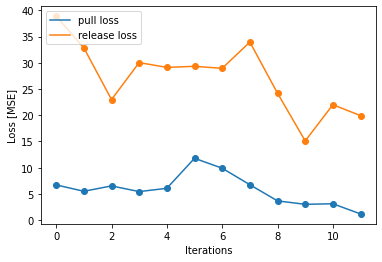

In [ ]:
plot_loss0 = []
plot_loss1 = []
x_loss = []
for i in range(len(loss)):
    plot_loss0.append(loss[i][0])
    plot_loss1.append(loss[i][1])
    x_loss.append(i)
plt.scatter(x_loss, plot_loss0)
plt.scatter(x_loss, plot_loss1)
plt.plot(x_loss, plot_loss0,label='pull loss')
plt.plot(x_loss, plot_loss1,label='release loss')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Loss [MSE]")

Text(0, 0.5, 'Relative error(%)')

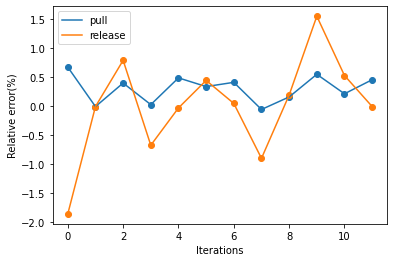

In [ ]:
plot_dif0 = []
plot_dif1 = []
x_dif = []
for i in range(len(error)):
    plot_dif0.append(error[i][0])
    plot_dif1.append(error[i][1])
    x_dif.append(i)
plt.scatter(x_dif, plot_dif0)
plt.scatter(x_dif, plot_dif1)
plt.plot(x_dif, plot_dif0,label='pull')
plt.plot(x_dif, plot_dif1,label='release')
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")

Text(0, 0.5, 'Force [g]')

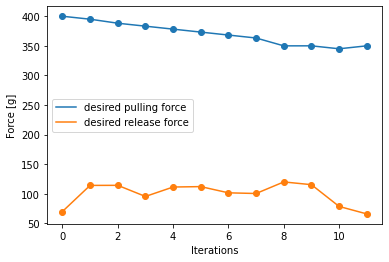

In [ ]:
plot_Fd0 = []
plot_Fd1 = []
x_Fd = []
for i in range(len(Fd)):
    plot_Fd0.append(Fd[i][0])
    plot_Fd1.append(Fd[i][1])
    x_Fd.append(i)
plt.scatter(x_Fd, plot_Fd0)
plt.scatter(x_Fd, plot_Fd1)
plt.plot(x_Fd, plot_Fd0,label='desired pulling force')
plt.plot(x_Fd, plot_Fd1,label='desired release force')
plt.legend(loc="center left")
plt.xlabel("Iterations")
plt.ylabel("Force [g]")